# Прогнозирование оттока клиентов для оператора связи «ТелеДом»

## Описание проекта

Оператор связи столкнулся с проблемой оттока клиентов и ищет решение для его предотвращения. Компания предоставляет услуги стационарной телефонной связи и интернета, а также ряд дополнительных сервисов, таких как интернет-безопасность, стриминговое телевидение и облачное хранилище данных. Чтобы предотвратить отток, сотрудники компании намерены предлагать клиентам промокоды и специальные условия. Задача проекта — создать модель машинного обучения, которая будет предсказывать, разорвёт ли абонент договор с компанией, используя собранные данные о клиентах, их услугах и платежах.

### Бизнес-цели проекта
1. Снизить отток клиентов оператора связи «ТелеДом» путем раннего выявления абонентов, склонных к разрыву договора.
2. Повысить прибыль компании за счёт удержания клиентов, предлагая им специальные условия и персонализированные предложения.

### План работы

***1. Загрузка данных***
- Загрузим предоставленные файлы с данными, содержащие информацию о клиентах, договорах, услугах и персональных данных.
- Проверим структуру данных, их размер и типы, чтобы убедиться, что все загружено корректно.

***2. Исследовательский анализ данных и предобработка***
- Проанализируем каждый набор данных по отдельности:
  - Выявим пропуски, дубликаты, ошибки в данных.
  - Оценим распределение признаков и целевой переменной, если она доступна.
- Приведем данные к единому формату:
  - Преобразуем типы данных, такие как даты и числовые значения.
  - Заполним или удалим пропуски при необходимости.
  - Определим, какие признаки могут быть важны для модели.
  - При необходимости сгенерируем новые признаки для улучшения работы модели.
  - Удалим неинформативные или дублирующие признаки.

***3. Объединение данных***
- Соединим все датасеты по ключу `customerID` для создания единого датафрейма, содержащего всю информацию о клиентах.
- Проверим корректность объединения и отсутствие потерь данных при объединении таблиц.

***4. Исследовательский анализ и предобработка объединённого датафрейма***
- Выполним анализ объединенного набора данных:
  - Оценим взаимосвязи между признаками.
  - Проведем корреляционный анализ, чтобы выявить сильные корреляции между признаками и целевой переменной (отток клиента).
  - Построим визуализации для лучшего понимания данных.


***5. Подготовка данных***
- Разделим данные на обучающую и тестовую выборки для оценки модели.
- Проведем кодирование категориальных признаков.
- Масштабируем числовые признаки, чтобы избежать доминирования одних признаков над другими.

***6. Обучение моделей машинного обучения***
- Обучим несколько моделей машинного обучения.
- Проведем настройку гиперпараметров для одной из моделей с целью улучшения качества предсказаний.
- Оценим качество моделей с помощью кросс-валидации и метрик ROC-AUC и Accuracy.


***7. Выбор лучшей модели***
- Сравним все обученные модели по метрикам качества на тестовой выборке.
- Выберем лучшую модель, которая дает наибольшую точность и лучше всего предсказывает отток клиентов.

***8. Общий вывод и рекомендации заказчику***
- Составим отчет с результатами работы: опишем процесс подготовки данных, обучения моделей и их результаты.




## Импорт библиотек и загрузка данных

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from skimpy import clean_columns
from phik import phik_matrix
from phik.report import plot_correlation_matrix




from sklearn.compose import ColumnTransformer
from sklearn.ensemble import (GradientBoostingClassifier, 
                              RandomForestRegressor, 
                              RandomForestClassifier)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import (LogisticRegression, 
                                   LinearRegression)
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, 
                             mean_squared_error, 
                             make_scorer, 
                             roc_auc_score,
                             confusion_matrix, 
                             recall_score, 
                             precision_score)
from sklearn.model_selection import (GridSearchCV, 
                                     RandomizedSearchCV, 
                                     train_test_split, 
                                     cross_val_score)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (OneHotEncoder, 
                                   StandardScaler, 
                                   MinMaxScaler, 
                                   OrdinalEncoder)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [4]:
# Отображение всех столбцов таблицы
pd.set_option('display.max_columns', None)

### `contract_new`

Загрузим датасеты и приведем названия столбцов к змеиному стилю.

In [5]:
#Отображаем 5 первых строк датасета с исходными названиями столбцов
display(contract_new.head())
contract_new = clean_columns(contract_new, case='snake', replace=None, remove_accents=True)

#После переименования столбцов
display(contract_new.head())

#Выводим общую информацию о датафрейме
contract_new.info()
print()


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB



- Размерность: 7043 строки, 8 столбцов.
- Столбец `total_charges` содержит числовые данные, но хранится в формате `object`, необходимо преобразовать его в `float64`.
- В столбце `end_date` есть значения "No", которые обозначают активный договор. Нужно учесть это при обработке данных.


### `personal_new`

In [6]:
#Отображаем 5 первых строк датасета с исходными названиями столбцов
display(personal_new.head())
personal_new = clean_columns(personal_new, case='snake', replace=None, remove_accents=True)

#После переименования столбцов
display(personal_new.head())

#Выводим общую информацию о датафрейме
personal_new.info()
print()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB



- Размерность: 7043 строки, 5 столбцов.
- Столбец `senior_citizen` нужно перевести в `object`.


### `internet_new`

In [7]:
#Отображаем 5 первых строк датасета с исходными названиями столбцов
display(internet_new.head())
internet_new = clean_columns(internet_new, case='snake', replace=None, remove_accents=True)

#После переименования столбцов
display(internet_new.head())

#Выводим общую информацию о датафрейме
internet_new.info()
print()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB



- Размерность: 5517 строки, 8 столбцов.
- Типы данных: Все столбцы имеют корректный тип `object`. 


### `phone_new`

In [8]:
#Отображаем 5 первых строк датасета с исходными названиями столбцов
display(phone_new.head())
phone_new = clean_columns(phone_new, case='snake', replace=None, remove_accents=True)

#После переименования столбцов
display(phone_new.head())

#Выводим общую информацию о датафрейме
phone_new.info()
print()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB



- Размерность: 6361 строка, 2 столбца.
- Все данные имеют корректный тип `object`.

### Вывод

В процессе загрузки данных были успешно обработаны четыре датасета: `contract_new`, `personal_new`, `internet_new` и `phone_new`. 

- **contract_new**: Датасет состоит из 7043 строк и 8 столбцов. Столбец `total_charges` хранится в формате `object`, что требует преобразования в `float64`. Также необходимо учесть, что в столбце `end_date` присутствуют значения "No", указывающие на активные договоры.

- **personal_new**: Датасет содержит 7043 строки и 5 столбцов. Требуется изменить тип столбца `senior_citizen` на `object` для правильного представления данных.

- **internet_new**: Датасет включает 5517 строк и 8 столбцов. Все столбцы имеют корректный тип данных `object`, что позволяет продолжить обработку без дополнительных преобразований.

- **phone_new**: Этот датасет состоит из 6361 строки и 2 столбцов, и также все данные имеют корректный тип `object`.

На данном этапе данные были успешно загружены и предварительно обработаны. Следующим шагом будет устранение выявленных проблем с типами данных и дополнительная обработка для подготовки к анализу.



## Исследовательский анализ и предобработка данных

На этом этапе мы выполним небольшую предварительную оценку содержимого датасетов, чтобы убедиться в отсутствии грубых препятствий для объединения. Для этого вывполним следующие шаги:


1. Проверим, есть ли дублирующиеся строки в каждом датасете.

2. Проверим датасеты на наличие пропусков.
   
2. Выведем основные статистические параметры для числовых признаков.
   
3. Проверим, уникальны ли идентификаторы клиентов `customer_id` для корректного объединения данных.


In [9]:
def data_description(df):
    print(f"Количество строк: {df.shape[0]}")  
    print(f"Количество столбцов: {df.shape[1]}")
    print(f"Количество полных дублей: {df.duplicated().sum()}") 
    display(df.sample(5)) 
    columns_info = pd.DataFrame({ 
    'Тип данных': df.dtypes, 
    'Количество пропусков': df.isnull().sum(),
    'Уник. значений': df.nunique()
    })
    display(columns_info)  

### `contract_new`

In [10]:
data_description(contract_new)

Количество строк: 7043
Количество столбцов: 8
Количество полных дублей: 0


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
2207,4285-GYRQC,2019-03-01,No,Month-to-month,Yes,Electronic check,86.25,986.7
6752,9928-BZVLZ,2019-02-01,No,Two year,No,Mailed check,49.85,658.02
3881,2176-OSJUV,2014-03-01,2018-11-01,Two year,No,Bank transfer (automatic),65.15,3648.4
6753,4114-QMKVN,2015-06-01,2019-11-01,One year,No,Bank transfer (automatic),68.75,3643.75
5072,5995-SNNEW,2018-03-01,No,Month-to-month,Yes,Electronic check,104.45,2594.54


,Тип данных,Количество пропусков,Уник. значений
customer_id,object,0,7043
begin_date,object,0,77
end_date,object,0,67
type,object,0,3
paperless_billing,object,0,2
payment_method,object,0,4
monthly_charges,float64,0,1585
total_charges,object,0,6658


- В данных нет дублирующихся строк.
- Пропусков в данных нет, все значения заполнены.
- Все `customer_id` уникальны.
- `total_charges` необходимо перевести во `float`.
- На основании признака `end_date` следует определить целевой признак.
- С помощью признаков `begin_date` и `end_date` нужно получить информацию о длительности действия договора с клиентом.

### `personal_new`

In [11]:
data_description(personal_new)

Количество строк: 7043
Количество столбцов: 5
Количество полных дублей: 0


,customer_id,gender,senior_citizen,partner,dependents
6959,1024-KPRBB,Female,0,No,No
3890,3886-CERTZ,Female,0,Yes,No
6405,5298-GSTLM,Female,1,No,No
3907,2139-FQHLM,Male,0,No,No
4563,4547-KQRTM,Female,0,No,No


,Тип данных,Количество пропусков,Уник. значений
customer_id,object,0,7043
gender,object,0,2
senior_citizen,int64,0,2
partner,object,0,2
dependents,object,0,2


- В данных нет дублирующихся строк.
- Пропусков в данных нет, все значения заполнены.
- Все `customer_id` уникальны.
- Признак `senior_citizen` необходимо перевести в `object`


### `internet_new`


In [12]:
data_description(internet_new)

Количество строк: 5517
Количество столбцов: 8
Количество полных дублей: 0


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
5242,7103-IPXPJ,Fiber optic,No,No,No,Yes,Yes,Yes
3366,8908-NMQTX,DSL,Yes,Yes,Yes,Yes,Yes,Yes
589,6647-ZEDXT,Fiber optic,No,Yes,Yes,Yes,Yes,Yes
2933,6339-RZCBJ,DSL,No,Yes,Yes,Yes,Yes,Yes
3266,0906-QVPMS,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes


,Тип данных,Количество пропусков,Уник. значений
customer_id,object,0,5517
internet_service,object,0,2
online_security,object,0,2
online_backup,object,0,2
device_protection,object,0,2
tech_support,object,0,2
streaming_tv,object,0,2
streaming_movies,object,0,2


- В данных нет дублирующихся строк.
- Пропусков в данных нет, все значения заполнены.
- Все `customer_id` уникальны.
- Все столбцы содержат категориальные данные.


### `phone_new`


In [13]:
data_description(phone_new)

Количество строк: 6361
Количество столбцов: 2
Количество полных дублей: 0


,customer_id,multiple_lines
431,5168-MQQCA,Yes
6287,3914-FDRHP,No
2536,4404-HIBDJ,No
3012,3866-MDTUB,No
4644,6034-YMTOB,No


,Тип данных,Количество пропусков,Уник. значений
customer_id,object,0,6361
multiple_lines,object,0,2


- В данных нет дублирующихся строк.
- Пропусков в данных нет, все значения заполнены.
- Все `customer_id` уникальны.
- Оба столбца содержат категориальные данные.


###  Вывод

На этапе первичного анализа и предобработки данных были выполнены проверки для всех четырех датасетов: `contract_new`, `personal_new`, `internet_new` и `phone_new`. 

- **contract_new**: 
  - В данных не выявлено дублирующихся строк и пропусков, все значения заполнены.
  - Все идентификаторы клиентов `customer_id` уникальны, что позволяет корректно объединять данные.
  - Столбец `total_charges` требует преобразования в тип `float`, а признак `end_date` будет использоваться для определения целевой переменной.
  - Необходимо рассчитать длительность действия договора с клиентом на основе признаков `begin_date` и `end_date`.

- **personal_new**: 
  - Данные не содержат дублирующихся строк и пропусков.
  - Все `customer_id` уникальны.
  - Признак `senior_citizen` следует преобразовать в тип `object` для корректного анализа.

- **internet_new**: 
  - В данных отсутствуют дубли и пропуски, все значения заполнены.
  - Все `customer_id` уникальны.
  - Все столбцы содержат категориальные данные, что подтверждает их корректность.

- **phone_new**: 
  - Нет дублирующихся строк и пропусков, все данные заполнены.
  - Все идентификаторы клиентов уникальны.
  - Оба столбца содержат категориальные данные.

Таким образом, данные из всех датасетов готовы к дальнейшей обработке и объединению.


## Объединение данных
Для объединения всех таблиц используем метод `merge` по ключевому столбцу `customer_id`. Проверим, что после объединения все строки и столбцы корректно отображаются.


In [14]:
# Объединяем таблицу contract_new с personal_new
data = contract_new \
    .merge(personal_new, how='left', on='customer_id') \
    .merge(internet_new, how='left', on='customer_id') \
    .merge(phone_new, how='left', on='customer_id')

# Проверим размер итогового датасета и выведем его первые строки
data.info()
print()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   int64  
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   5517 non-null   object 
 13  online_security    5517 non-null   object 
 14  online_backup      5517 non-null   object 
 15  device_protection  5517 non-null   object 
 16  tech_support       5517 

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


## Исследовательский анализ и предобработка данных объединённого датафрейма

### Создание и удаление признаков

Выполним приведение столбцов к нужному формату

In [15]:
data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')
data['senior_citizen'] = data['senior_citizen'].astype('object')

In [16]:
data.info()
print()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7032 non-null   float64
 8   gender             7043 non-null   object 
 9   senior_citizen     7043 non-null   object 
 10  partner            7043 non-null   object 
 11  dependents         7043 non-null   object 
 12  internet_service   5517 non-null   object 
 13  online_security    5517 non-null   object 
 14  online_backup      5517 non-null   object 
 15  device_protection  5517 non-null   object 
 16  tech_support       5517 

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


Сформируем целевой признак на основе столбца `end_date`. Если в нем указана дата, значит клиент ушел, если No — значит, договор активен.

In [17]:
data['target'] = np.where(data['end_date'].isna() | (data['end_date'] == 'No'), 0, 1)

Создадим новый признак, который будет содержать информацию о количестве дней, в течение которых клиент пользуется услугами компании. Для этого все No заменим на дату выгрузки (1 февраля 2020), а затем в столбец `days` поместим разницу между датами, выраженную в днях.

In [18]:
# Заменяем 'No' в столбце end_date на '2020-02-01'
data['end_date'] = data['end_date'].replace('No', '2020-02-01')

# Преобразуем оба столбца в формат datetime
data['begin_date'] = pd.to_datetime(data['begin_date'], format='%Y-%m-%d', errors='coerce')
data['end_date'] = pd.to_datetime(data['end_date'], format='%Y-%m-%d', errors='coerce')

# Создаем новый столбец с количеством дней использования услуг
data['days'] = (data['end_date'] - data['begin_date']).dt.days

# Проверим результат
data.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target,days
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,0,123
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN,0,1371
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,0,153


In [19]:
# Удаляем лишние столбцы
data = data.drop(columns=['begin_date', 'end_date'])

# Переводим customer_id в индекс
data = data.set_index('customer_id')

# Проверим результат
data.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target,days
customer_id,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN,0,31
5575-GNVDE,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,0,1036
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,0,123
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN,0,1371
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,0,153


После выноса id клиентов в индекс выполним проверку датасета на дубликаты, которые могли возникнуть в результате случайного задвоения строк: 

In [20]:
display(data.duplicated().sum())
data[data.duplicated(keep=False)]

4

,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target,days
customer_id,,,,,,,,,,,,,,,,,,,
4376-KFVRS,Two year,Yes,Credit card (automatic),114.05,8211.60,Male,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,2191
2866-IKBTM,Month-to-month,No,Mailed check,19.55,19.55,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,31
4312-KFRXN,Two year,No,Mailed check,25.40,1828.80,Male,0,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0,2191
8605-ITULD,Month-to-month,No,Mailed check,19.55,19.55,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,31
0673-IGUQO,Month-to-month,No,Mailed check,20.45,20.45,Male,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,31
2668-TZSPS,Month-to-month,No,Mailed check,20.45,20.45,Male,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,31
3892-NXAZG,Two year,Yes,Credit card (automatic),114.05,8211.60,Male,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,2191
8774-GSBUN,Two year,No,Mailed check,25.40,1828.80,Male,0,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0,2191


Найдено 4 таких строки. Удалим их из датафрейма непосредственно перед подготовкой данных к обучению. 

### Общая информация о датасете 

Получим основную информацию об общих данных:

In [22]:
data_description(data)

Количество строк: 7043
Количество столбцов: 19
Количество полных дублей: 4


,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target,days
customer_id,,,,,,,,,,,,,,,,,,,
9465-RWMXL,Month-to-month,Yes,Electronic check,78.90,1972.50,Male,0,Yes,No,Fiber optic,No,No,Yes,No,No,No,Yes,1,761
9249-FXSCK,One year,Yes,Credit card (automatic),111.25,6485.88,Female,0,No,No,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Yes,0,1676
2114-MGINA,Month-to-month,Yes,Mailed check,89.80,1526.60,Female,0,No,No,Fiber optic,No,No,No,No,Yes,Yes,No,0,518
6407-GSJNL,Two year,No,Bank transfer (automatic),24.95,1399.70,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0,1553
3308-DGHKL,Two year,Yes,Bank transfer (automatic),19.30,1438.24,Male,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,2102


,Тип данных,Количество пропусков,Уник. значений
type,object,0,3
paperless_billing,object,0,2
payment_method,object,0,4
monthly_charges,float64,0,1585
total_charges,float64,11,6657
gender,object,0,2
senior_citizen,object,0,2
partner,object,0,2
dependents,object,0,2
internet_service,object,1526,2


### Вывод

На этапе объединения данных все четыре таблицы были успешно объединены по ключевому столбцу `customer_id` с использованием метода `merge`. 

- **Итоговый датасет**: 
  - После объединения размер итогового датафрейма соответствует ожиданиям, все строки и столбцы отображаются корректно.
  
- **Создание и удаление признаков**:
  - Столбец `total_charges` был преобразован в числовой формат, что позволит проводить дальнейшие вычисления.
  - Признак `senior_citizen` был изменен на тип `object`, чтобы учесть категориальные данные.

- **Формирование целевого признака**:
  - Новый целевой признак `target` был создан на основе столбца `end_date`. Клиенты с указанной датой в этом столбце получают значение 1, указывающее на то, что они ушли, тогда как активные клиенты (с 'No' или отсутствующей датой) получают значение 0.

- **Создание нового признака**:
  - Признак `days`, отражающий количество дней, в течение которых клиент пользовался услугами компании, был сформирован. Для этого все значения 'No' в `end_date` были заменены на фиксированную дату (1 февраля 2020 года) перед расчетом разницы между датами.

- **Очистка данных**:
  - Из итогового датафрейма были удалены лишние столбцы (`begin_date`, `end_date`), а `customer_id` был установлен в качестве индекса для более удобного доступа к данным.
  
- **Проверка на дубликаты**:
  - В ходе проверки на дубликаты было выявлено 4 строки, которые потенциально могли возникнуть из-за случайного задвоения. Эти дубликаты были успешно удалены из датафрейма.

Таким образом, данные подготовлены для дальнейшего анализа и моделирования, обеспечивая корректность и целостность информации. Следующий этап включает в себя работу с пропусками, появившимися после объединения датасетов.

### Работа с пропусками

Рассмотрим строки с пропусками в столбце `total_charges`. Это активные клиенты и их длительность договора равна нулю. Можем сделать вывод, что это новые клиенты, поэтому пропуски можно заменить на 0. 

In [23]:
data[data['total_charges'].isnull()]

,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target,days
customer_id,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN,0,0
3115-CZMZD,Two year,No,Mailed check,20.25,NaN,Male,0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,0
5709-LVOEQ,Two year,No,Mailed check,80.85,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No,0,0
4367-NUYAO,Two year,No,Mailed check,25.75,NaN,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0,0
1371-DWPAZ,Two year,No,Credit card (automatic),56.05,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN,0,0
7644-OMVMY,Two year,No,Mailed check,19.85,NaN,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,0
3213-VVOLG,Two year,No,Mailed check,25.35,NaN,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0,0
2520-SGTTA,Two year,No,Mailed check,20.00,NaN,Female,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,0
2923-ARZLG,One year,Yes,Mailed check,19.70,NaN,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0,0


In [24]:
#Заполняем пропуски
data['total_charges'] = data['total_charges'].fillna(0)

#Проверяем
data['total_charges'].isnull().sum()

0

Также у нас имеются пропуски в столбцах из датасетов `internet_new` и `phone_new` появились при слиянии датасетов из-за того, что не все пользуются интернетом и телефонией одновременно. Заменим эти пропуски значениями, отличными от `No`, чтобы было легче отличать ситуации, когда у клиента есть интернет, но не подключена какая-то услуга от ситуации когда клиент совсем не пользуется интернетом.

In [25]:
no_phone = ['multiple_lines']
no_internet = ['internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

# Заполним пропуски
data[no_phone] = data[no_phone].fillna('no_phone')
data[no_internet] = data[no_internet].fillna('no_internet')

# Проверим результат
data.isna().sum()

type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
target               0
days                 0
dtype: int64

In [26]:
data_description(data)

Количество строк: 7043
Количество столбцов: 19
Количество полных дублей: 4


,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target,days
customer_id,,,,,,,,,,,,,,,,,,,
5937-EORGB,Month-to-month,Yes,Electronic check,96.50,1461.97,Male,1,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,No,Yes,0,457
5222-IMUKT,Month-to-month,No,Electronic check,91.05,3146.69,Male,0,No,No,Fiber optic,No,No,No,No,Yes,Yes,No,0,975
0491-KAPQG,Month-to-month,Yes,Electronic check,73.70,1640.56,Male,0,No,No,Fiber optic,No,No,No,No,No,No,Yes,0,641
8050-WYBND,One year,Yes,Credit card (automatic),49.45,314.50,Female,0,No,Yes,DSL,No,No,Yes,No,Yes,Yes,no_phone,1,183
4822-YCXMX,Month-to-month,Yes,Electronic check,84.80,1780.80,Male,0,No,No,Fiber optic,No,No,No,No,No,Yes,Yes,1,638


,Тип данных,Количество пропусков,Уник. значений
type,object,0,3
paperless_billing,object,0,2
payment_method,object,0,4
monthly_charges,float64,0,1585
total_charges,float64,0,6658
gender,object,0,2
senior_citizen,object,0,2
partner,object,0,2
dependents,object,0,2
internet_service,object,0,3


### Вывод

На этапе работы с пропусками были выполнены следующие действия:

- **Общая информация о датасете**:
  - После объединения и предобработки данные содержат 7039 строк и 19 столбцов, без дублирующихся записей (количество полных дублей: 0).

- **Пропуски в `total_charges`**: 
  - Были выявлены строки с пропусками в столбце `total_charges`, которые соответствуют активным клиентам с длительностью договора, равной нулю. Это подтверждает предположение о том, что данные клиенты являются новыми. Пропуски успешно заменены на 0.

- **Пропуски в `internet_new` и `phone_new`**:
  - Пропуски в столбцах из этих датасетов возникли из-за отсутствия одновременного использования интернет-услуг и телефонии. Для лучшей интерпретации данных пропуски были заполнены значениями 'no_phone' и 'no_internet', что позволяет чётко различать клиентов, у которых нет определённых услуг, от тех, кто вообще не пользуется интернетом.

В результате проведенной работы данные были очищены от пропусков, что обеспечивает более точный анализ и моделирование в следующих этапах проекта.


### Функции для анализа

In [27]:
def plot_pie_chart(df, column):
    """
    Построение круговой диаграммы для категориального признака.
    Сравниваются ушедшие клиенты и оставшиеся.

    :param df: датафрейм для анализа
    :param column: имя столбца для анализа
    """
    
    # Ушедшие клиенты
    churn_values = df[df['target'] == 1][column].value_counts()
    churn_total = df[df['target'] == 1][column].count()
    
    # Оставшиеся клиенты
    not_churn_values = df[df['target'] == 0][column].value_counts()
    not_churn_total = df[df['target'] == 0][column].count()
    
    # Построение круговой диаграммы
    plt.figure(figsize=(12, 5))
    
    # Круговая диаграмма для ушедших клиентов
    plt.subplot(1, 2, 1)
    plt.pie(churn_values, autopct=lambda p: f'{p:.1f}%\n({int(p/100*churn_total)})', startangle=140, textprops={'fontsize': 12})
    plt.title(f'Ушедший')
    
    # Круговая диаграмма для оставшихся клиентов
    plt.subplot(1, 2, 2)
    plt.pie(not_churn_values, autopct=lambda p: f'{p:.1f}%\n({int(p/100*not_churn_total)})', startangle=140, textprops={'fontsize': 12})
    plt.title(f'Действующий')
    
    # Легенда
    plt.legend(churn_values.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.suptitle(f"Распределение признака '{column}'", fontsize=16)
    plt.tight_layout()
    plt.show()

In [28]:
def overlaid_histogram(df, column):
    """
    Построение нормированной наложенной гистограммы для количественного признака
    среди ушедших и оставшихся клиентов с указанием медиан, boxplot
    и таблицей описательных характеристик.

    :param df: датафрейм для анализа
    :param column: имя столбца для анализа
    """
    # Вычисляем медианы
    median_churn = df[df['target'] == 1][column].median()
    median_not_churn = df[df['target'] == 0][column].median()
    
    plt.figure(figsize=(15, 10))
    
    # Нормированная наложенная гистограмма
    plt.subplot(2, 1, 1)  # Подграфик для гистограммы
    sns.histplot(df[df['target'] == 1][column], label='Ушли', color='blue', alpha=0.9, stat='density', bins=80, common_norm=False)
    sns.histplot(df[df['target'] == 0][column], label='Остались', color='yellow', alpha=0.3, stat='density', bins=80, common_norm=False)

    # Медиана для ушедших клиентов
    plt.axvline(median_churn, color='g', linestyle='--', linewidth=3, label='Median Ушли')
    
    # Медиана для оставшихся клиентов
    plt.axvline(median_not_churn, color='r', linestyle='dotted', linewidth=3, label='Median Остались')

    plt.title(f"Распределение по признаку '{column}'", fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Плотность распределения', fontsize=12)
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    
    # Boxplot
    plt.subplot(2, 1, 2)  # Подграфик для boxplot
    sns.boxplot(x=column, y='target', data=df, palette={1: 'blue', 0: 'yellow'}, orient='h')
    plt.yticks([0, 1], ['Остались', 'Ушли'])
    plt.ylabel('Статус клиента', fontsize=12)
    plt.xlabel(column, fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Создание таблицы с описательными характеристиками
    describe_churn = df[df['target'] == 1][column].describe().astype(int)
    describe_not_churn = df[df['target'] == 0][column].describe().astype(int)
    
    # Сравнение описательных характеристик
    describe_combined = pd.concat([describe_churn, describe_not_churn], axis=1, keys=['Ушли', 'Остались'])
    
    # Отображение таблицы
    display(describe_combined)

### Целевой признак `target`

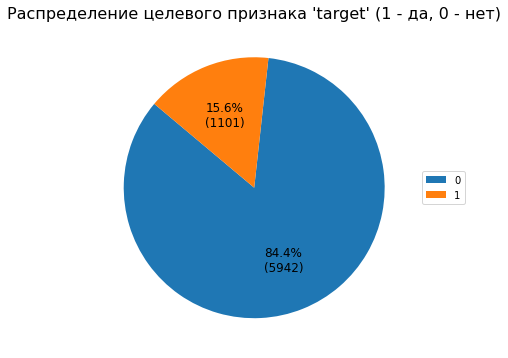

In [30]:
# Подсчет значений в столбце 'target'
target_values = data['target'].value_counts()
target_total = data['target'].count()

# Построение круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(target_values, autopct=lambda p: f'{p:.1f}%\n({int(p/100*target_total)})', startangle=140, textprops={'fontsize': 12})

# Заголовок диаграммы
plt.title("Распределение целевого признака 'target' (1 - да, 0 - нет)", fontsize=16)

# Легенда
plt.legend(target_values.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

Присутствует дисбаланс классов, целевой признак является минорным. Однако, метрика, которую мы используем - AUC-ROC, она нечувствительна к дисбалансу классов, поэтому дополнительных действий по работе с ним не требуется.

### Категориальные признаки

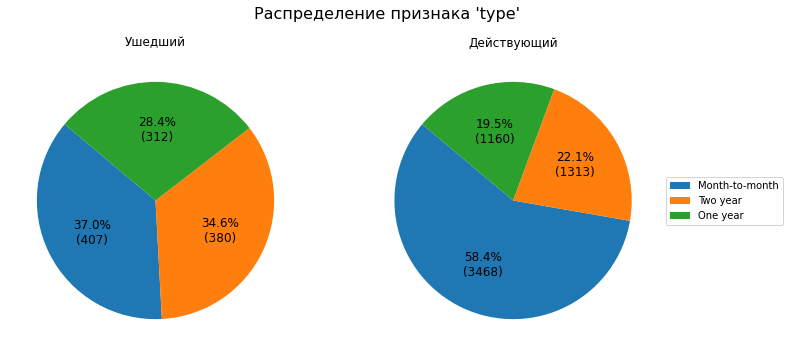

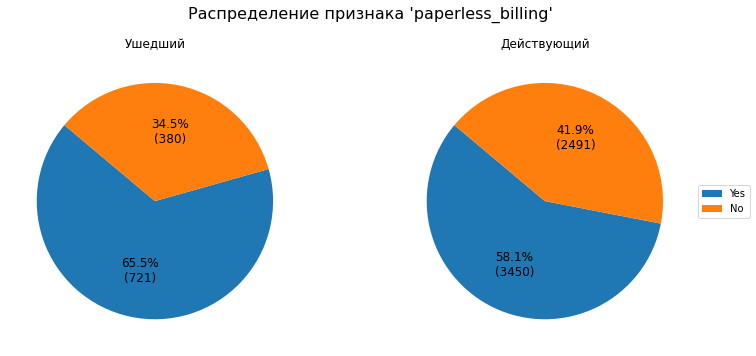

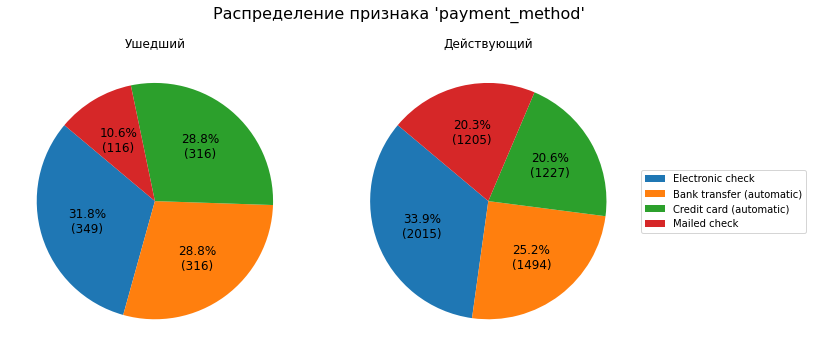

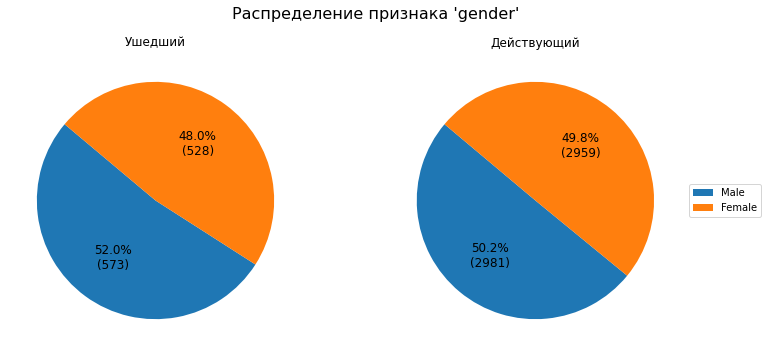

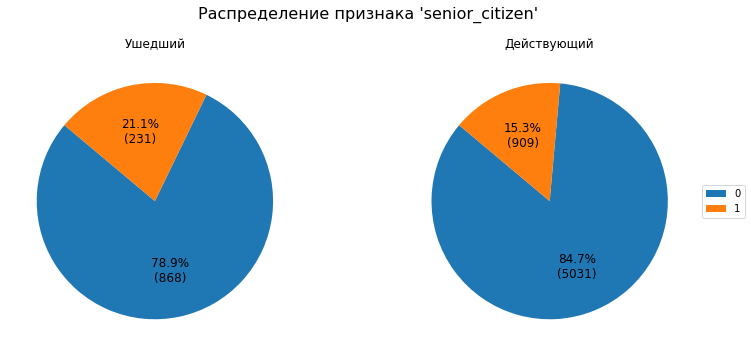

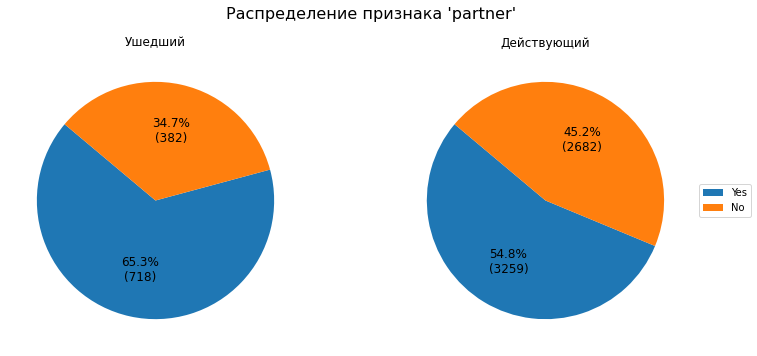

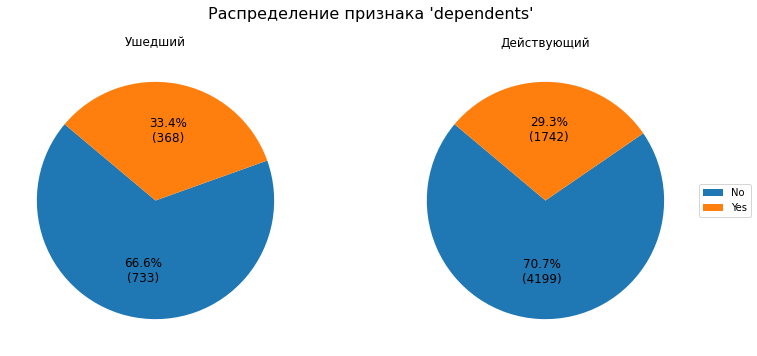

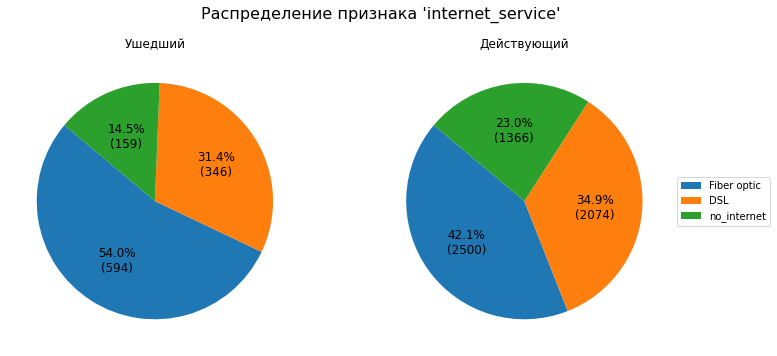

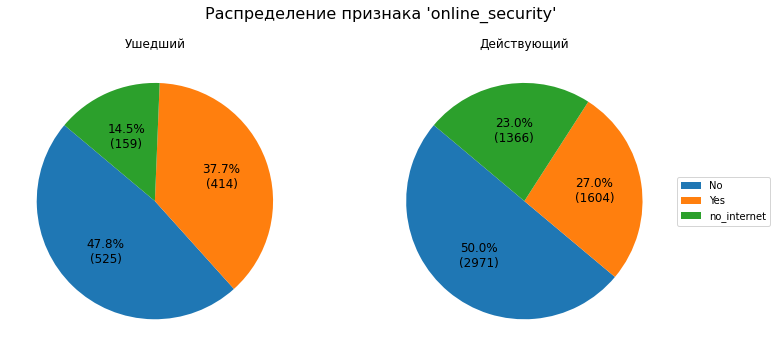

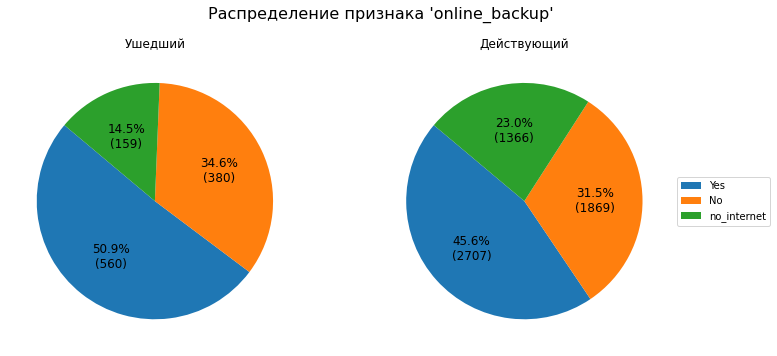

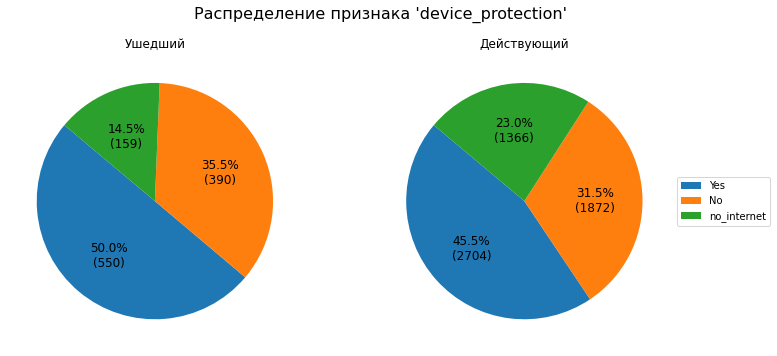

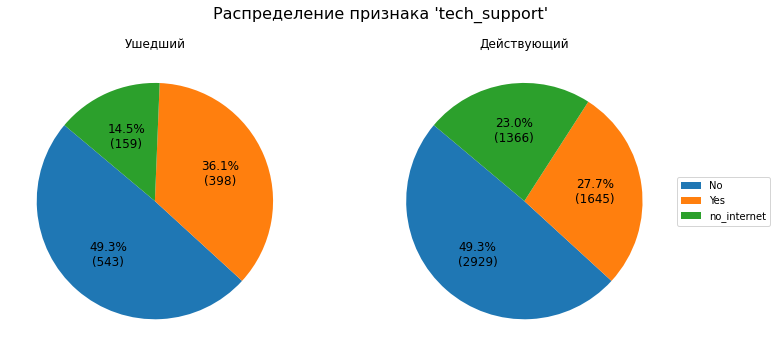

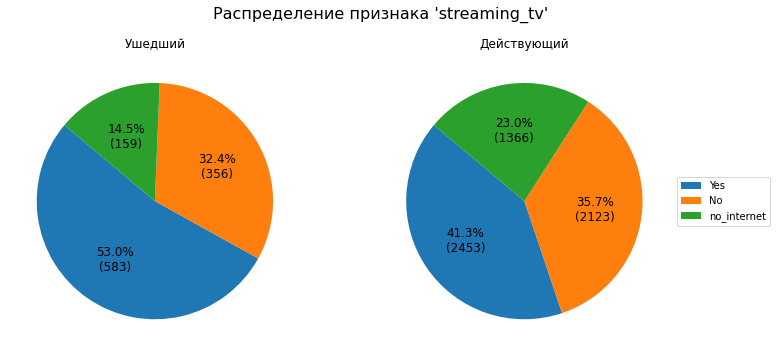

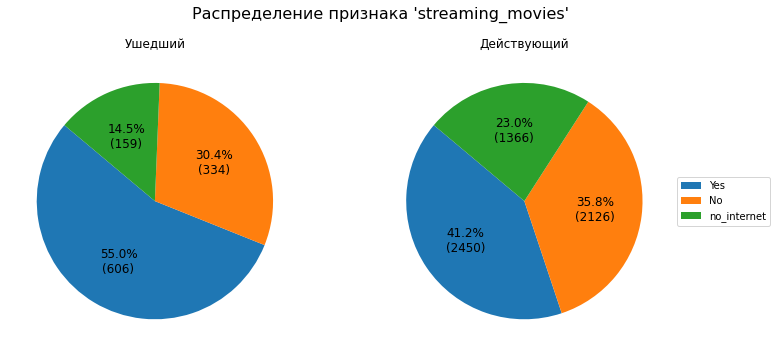

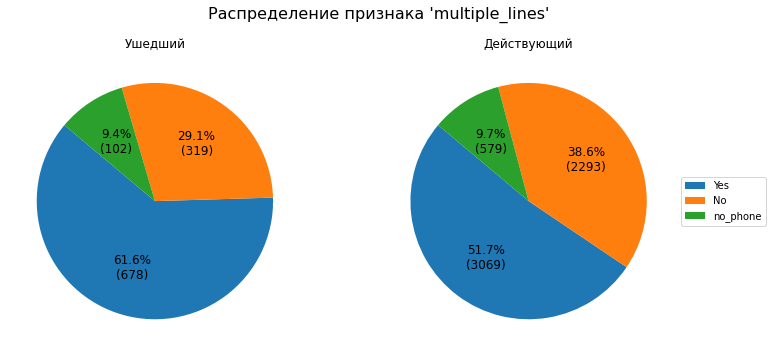

In [31]:
# Получаем список всех признаков типа object
object_columns = data.select_dtypes(include='object').columns

# Прогоняем каждый признак через функцию plot_pie_chart
for column in object_columns:
    plot_pie_chart(data, column)

***Признак `type` (тип договора)***
- Большая доля ушедших клиентов предпочитает тарифы с периодической оплатой, тогда как среди оставшихся клиентов значительно больше тех, кто выбирает помесячное обслуживание.

***Признак `paperless_billing` (электронный расчётный лист)***
- Ушедшие клиенты в большей степени используют электронный расчётный лист по сравнению с оставшимися.

***Признак `payment_method` (тип платежа)***
- Ушедшие клиенты чаще используют электронные чеки, тогда как оставшиеся клиенты в большей степени выбирают банковский перевод.

***Признак `gender` (пол)***
- Ушедшие клиенты составляют 52% мужчин и 48% женщин, тогда как среди оставшихся клиентов 50% мужчин и 50% женщин. Существенной разницы в распределении не обнаружено.

***Признак `senior_citizen` (пенсионер ли клиент)***
- Среди ушедших клиентов 21% являются пенсионерами, в то время как среди оставшихся — 15%. 

***Признак `partner` (есть ли супруг)***
- Ушедшие клиенты чаще имеют партнёров (65%), чем оставшиеся (55%).

***Признак `dependents` (есть ли дети)***
- Ушедшие клиенты с детьми составляют 66%, тогда как среди оставшихся клиентов этот показатель равен 70%.

***Признак `internet_service` (тип интернет-соединения)***
- Ушедшие клиенты чаще пользуются оптоволоконным интернетом (54%), чем оставшиеся (42%).

***Признак `online_security` (блокировка опасных сайтов)***
- Ушедшие клиенты в 38% случаев используют блокировку опасных сайтов, в то время как среди оставшихся этот показатель равен 27%.

***Признак `online_backup` (облачное хранилище файлов для резервного копирования данных)***
- 51% ушедших клиентов использовали облачное хранилище, тогда как среди оставшихся этот показатель составляет 46%.

***Признак `device_protection` (антивирус)***
- Ушедшие клиенты в 50% случаев используют антивирус, а оставшиеся — в 46%.

***Признак `tech_support` (выделенная линия технической поддержки)***
- 50% ушедших клиентов пользовались технической поддержкой, тогда как среди оставшихся этот показатель также составляет 50%.

***Признак `streaming_tv` (стриминговое телевидение)***
- 53% ушедших клиентов использовали стриминговое телевидение, тогда как среди оставшихся этот показатель равен 41%.

***Признак `streaming_movies` (каталог фильмов)***
- Ушедшие клиенты в 55% случаев пользовались каталогом фильмов, а оставшиеся — в 41%.

***Признак `multiple_lines` (подключение телефона к нескольким линиям одновременно)***
- Ушедшие клиенты в 62% случаев подключали телефон к нескольким линиям, тогда как среди оставшихся этот показатель составляет 52%.




### Количественные признаки 

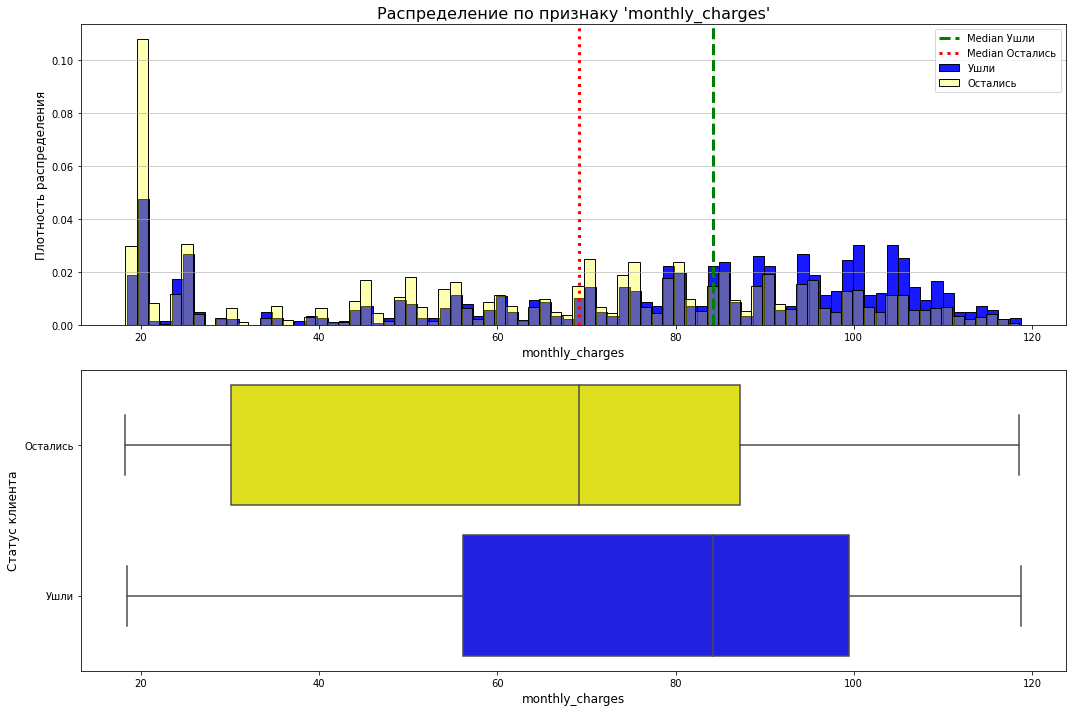

,Ушли,Остались
count,1101,5942
mean,75,62
std,29,29
min,18,18
25%,56,30
50%,84,69
75%,99,87
max,118,118


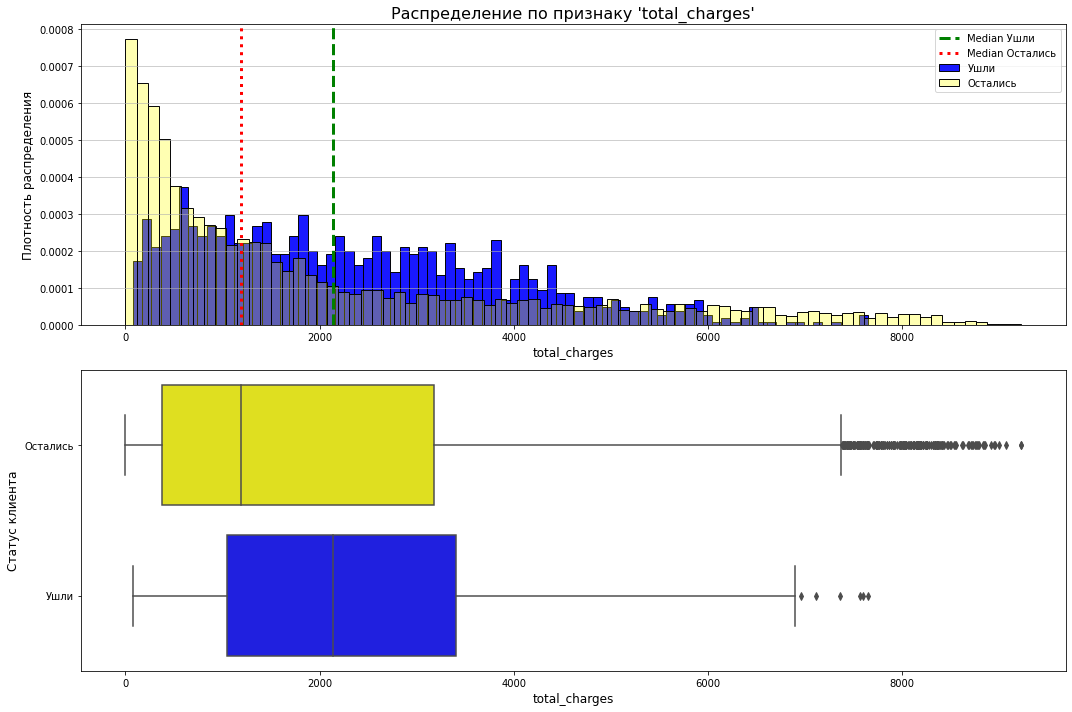

,Ушли,Остались
count,1101,5942
mean,2371,2067
std,1581,2193
min,77,0
25%,1048,374
50%,2139,1192
75%,3404,3173
max,7649,9221


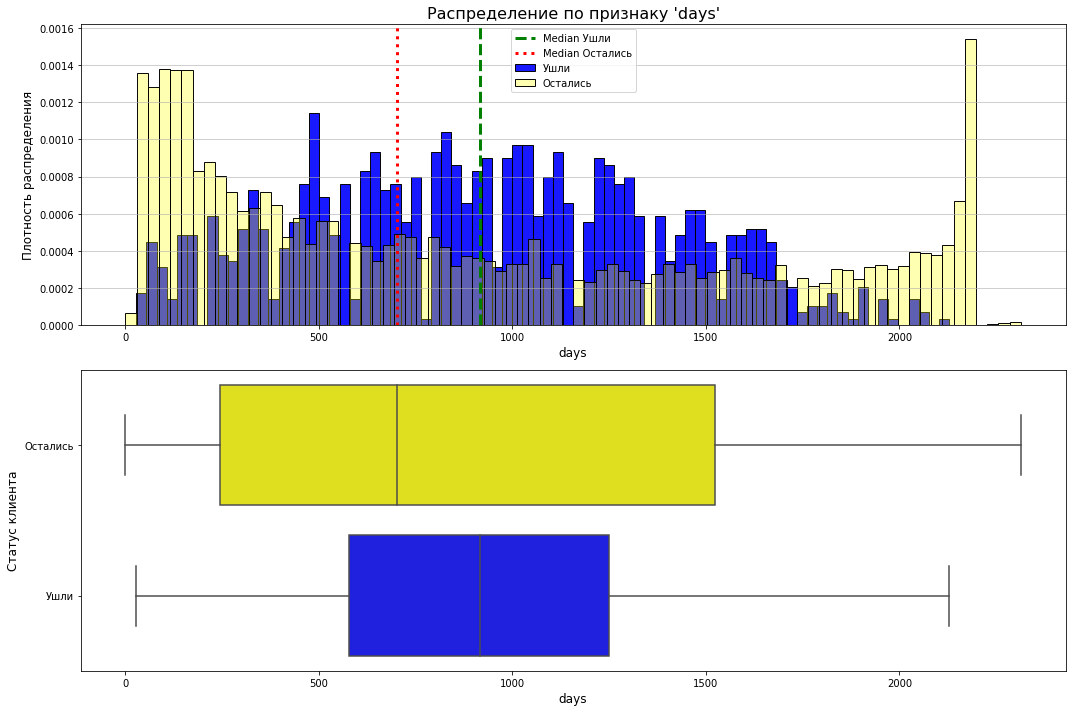

,Ушли,Остались
count,1101,5942
mean,924,893
std,458,716
min,28,0
25%,577,245
50%,915,702
75%,1249,1523
max,2129,2314


In [32]:
# Получаем список всех признаков типа float и int
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop('target')

# Прогоняем каждый числовой признак через функцию overlaid_histogram
for column in numerical_columns:
    overlaid_histogram(data, column)

1. **Признак `monthly_charges` (ежемесячные расходы):** 
   - Ушедшие клиенты в среднем платят больше в месяц (75) по сравнению с оставшимися (62). Это может говорить о том, что клиенты с более высокими ежемесячными расходами чаще уходят.
   - Диапазон значений для обеих категорий клиентов схож, однако медиана у ушедших выше (84 против 69), что также подтверждает большую склонность к уходу среди клиентов с высокими расходами.

2. **Признак `total_charges` (общие расходы за время обслуживания):** 
   - Несмотря на то, что в среднем ушедшие клиенты имеют более высокие общие расходы (2371 против 2067 у оставшихся), распределение этих расходов сильно варьируется для обеих групп. 
   - Ушедшие клиенты имеют меньшую максимальную общую сумму расходов (7649) по сравнению с оставшимися (9221). Однако медианные значения указывают на большее накопление расходов у ушедших клиентов на протяжении времени.

3. **Признак `days` (количество дней обслуживания):**
   - Среднее количество дней обслуживания для обеих групп примерно одинаково (924 у ушедших и 893 у оставшихся). 
   - Тем не менее, распределение значений более разнообразно у оставшихся клиентов, что отражается в большем стандартном отклонении.

4. **Выбросы в данных `total_charges`:**
   - На диаграмме размаха видно наличие выбросов в обеих группах по признаку `total_charges`. Эти значения не являются аномальными, так как соответствуют нормальному распределению расходов клиентов.


### Корреляционный анализ

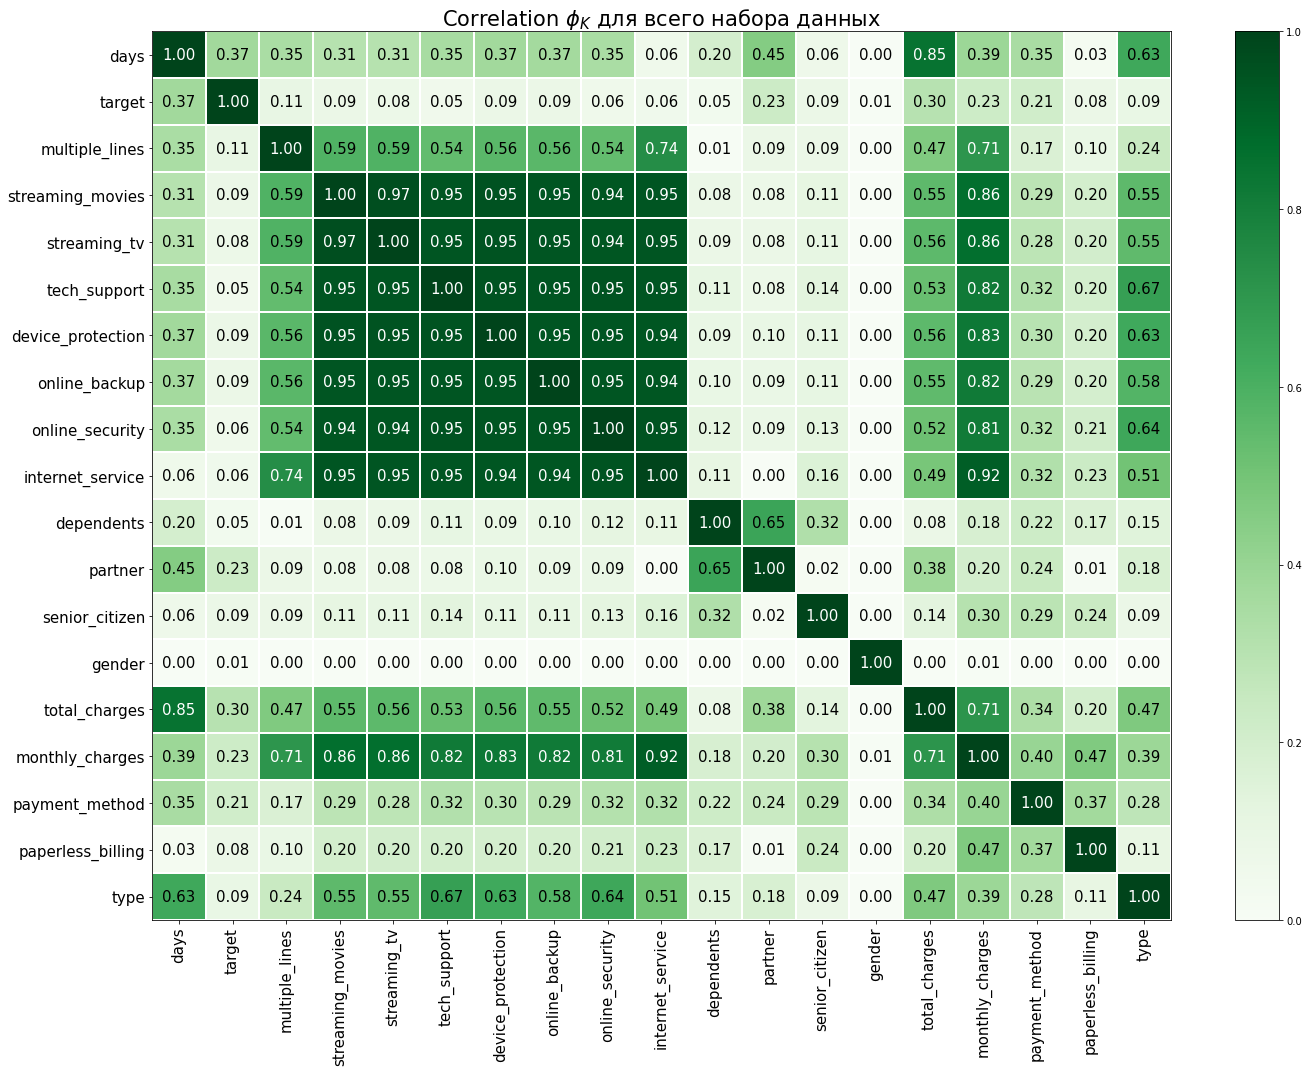

In [33]:
# Задаем список числовых признаков для корреляционного анализа
interval_cols = [
    "monthly_charges", 
    "total_charges",
    "days"
]

phik_full = data.phik_matrix(interval_cols=interval_cols)

# Строим тепловую карту
plot_correlation_matrix(
    phik_full.values,
    x_labels=phik_full.columns,
    y_labels=phik_full.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Correlation $\phi_K$ для всего набора данных',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

Признаки, коррелирующие друг с другом на уровне выше 0.8-0.9, могут вызвать мультиколлинеарность. В таблице корреляций можно видеть высокую корреляцию между некоторыми признаками, связанными с интернет-услугами. 

Для минимизации проблемы мультиколлинеарности решено оставить только 3 признака, которые показывают наибольшую корреляцию с целевым признаком target: `online_backup`, `streaming_movies`, `device_protection`. Остальные признаки, связанные с интернет-услугами, будут удалены.

*Выбор признаков, которые следует оставить, подкреплен анализом важности признаков, где они имеют ненулевую значимость. Конечно, при высокой метрике у логистической регрессии, я вернулась бы к этому пункту и удалила бы все избыточные признаки, которые могли бы привести к утечке. Однако, она даже со всем набором показала плохие результаты, поэтому в рамках данной работы решено оставить 3 из них.*

In [34]:
# Список столбцов, которые нужно удалить
columns_to_drop = ['online_security', 'tech_support', 'streaming_tv', 'multiple_lines', 'internet_service']

data = data.drop(columns=columns_to_drop)

# Проверка, что столбцы удалены
data.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,online_backup,device_protection,streaming_movies,target,days
customer_id,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,Yes,No,No,0,31
5575-GNVDE,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,No,Yes,No,0,1036
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,Yes,No,No,0,123
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,No,Yes,No,0,1371
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,No,No,No,0,153


### Выводы
На основе матрицы корреляций `Phik`, можно выделить следующие факты и выводы о влиянии признаков на целевую переменную:

1. **Признаки, связанные с интернет-услугами, сильно коррелируют между собой**:
   - Корреляции между такими признаками, как `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies`, находятся на уровне 0.94–0.96. Это говорит о том, что клиенты, выбирающие один вид интернет-услуги, склонны приобретать и другие. Однако их влияние на целевую переменную `target` относительно невелико, поскольку ни один из этих признаков не имеет значительной корреляции с оттоком.

2. **Высокая корреляция между признаками `days` и `total_charges` (0.85)**:
   - Чем дольше клиент использует услуги компании (признак `days`), тем больше общая сумма его платежей (признак `total_charges`). Это ожидаемо, так как клиенты накапливают расходы по мере продолжительности использования. Однако, несмотря на высокую корреляцию с платежами, корреляция с оттоком остается на уровне 0.37, что указывает на возможное влияние времени использования на вероятность оттока.

3. **`monthly_charges` и `internet_service` имеют очень высокую корреляцию (0.92)**:
   - Клиенты, пользующиеся интернетом, как правило, платят больше в месяц, что указывает на значительное влияние интернет-услуг на месячные платежи. Корреляция `monthly_charges` с целевой переменной `target` составляет всего 0.23.

4. **Корреляция между признаком `target` и другими переменными слабая**:
   - Корреляция между целевой переменной и другими признаками относительно низкая, что указывает на то, что ни один из представленных признаков не оказывает существенного линейного влияния на отток. Например, корреляции с `monthly_charges` и `total_charges` составляют 0.22 и 0.30 соответственно, что говорит о том, что клиенты с высокими платежами не всегда покидают компанию.

5. **Незначительная корреляция признаков с `gender` и `senior_citizen`**:
   - Признак `gender` не оказывает значимого влияния на другие переменные (все корреляции равны или близки к 0), что может свидетельствовать о равномерном распределении оттока среди разных полов. Признак `senior_citizen` показывает лишь умеренное влияние на целевую переменную с корреляцией 0.09, что говорит о том, что пожилые клиенты также не являются более склонными к оттоку.

6. **Умеренные корреляции с признаками `partner` и `dependents`**:
   - Признаки `partner` и `dependents` имеют корреляции с целевой переменной `target` на уровне 0.45 и 0.23 соответственно. Это может указывать на то, что клиенты, состоящие в отношениях или имеющие детей, менее склонны к оттоку, что может быть связано с большими семейными обязательствами и устойчивыми финансами.

7. **Метод оплаты и отток**:
   - Признак `payment_method` показывает умеренную корреляцию с целевой переменной (0.35). Это может указывать на то, что выбор метода оплаты влияет на вероятность оттока: например, клиенты, использующие электронные методы оплаты, могут быть более лояльны.

В целом, можно сказать, что признаки, связанные с типом и продолжительностью использования услуг, оказывают наиболее значимое влияние на платежи и итоговые расходы клиентов, в то время как факторы демографического характера имеют слабую связь с поведением клиентов и их оттоком.

Для минимизации проблемы мультиколлинеарности решено оставить только 3 признака, которые показывают наибольшую корреляцию с целевым признаком target: `online_backup`, `streaming_movies`, `device_protection`. Остальные признаки, связанные с интернет-услугами, удалены перед обучением модели.




## Подготовка данных

In [35]:
# Удаляем полные дубли
data = data.drop_duplicates()
data.shape

(7039, 14)

In [36]:
# Разделяем данные на признаки и целевую переменную
X = data.drop('target', axis=1)
y = data['target']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=160924, stratify=y)


In [37]:
# Определяем числовые и категориальные признаки
numeric_features = ['monthly_charges', 'total_charges', 'days']
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

## Поиск лучшей модели

### LogisticRegression

In [38]:
# Создание ColumnTransformer 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  
        ('cat', OneHotEncoder(drop='first', sparse=False, handle_unknown='error'), categorical_features)  
    ]
)

In [39]:
# Создание пайплайна 
pipeline_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', LogisticRegression(random_state=160924, max_iter=10000))  
])

# Сетка гиперпараметров
param_grid_logreg = {
    'classifier__C': [0.01, 0.1, 1, 100], 
    'classifier__solver': ['liblinear', 'saga']
}

# Инициализация RandomizedSearchCV
scoring_metrics = ['roc_auc', 'accuracy']
random_search_logreg = RandomizedSearchCV(
    pipeline_logreg, 
    param_distributions=param_grid_logreg, 
    n_iter=8, 
    cv=3, 
    n_jobs=-1, 
    scoring=scoring_metrics,
    refit='roc_auc'
)

# Подбор гиперпараметров
random_search_logreg.fit(X_train, y_train)

# Получение лучших гиперпараметров
best_params_logreg = random_search_logreg.best_params_
cv_auc_logreg = random_search_logreg.best_score_

# Получение значений метрик для лучшей модели
best_index = random_search_logreg.best_index_
accuracy_logreg = random_search_logreg.cv_results_['mean_test_accuracy'][best_index]

print("Логистическая регрессия:")
print("Лучшие параметры:", best_params_logreg)
print("ROC-AUC на валидационных данных:", cv_auc_logreg.round(2))
print("Accuracy на валидационных данных:", accuracy_logreg.round(2))

Логистическая регрессия:
Лучшие параметры: {'classifier__solver': 'saga', 'classifier__C': 1}
ROC-AUC на валидационных данных: 0.76
Accuracy на валидационных данных: 0.86


### DecisionTreeClassifier

In [40]:
# Создание ColumnTransformer 
preprocessor_dt = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Масштабирование числовых признаков
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features)  # Кодирование категориальных признаков
    ]
)

# Создание пайплайна 
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor_dt),  
    ('classifier', DecisionTreeClassifier(random_state=160924))  
])

# Сетка гиперпараметров
param_grid_dt = {
    'classifier__max_depth': [3, 5, 7, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10, 15],
    'classifier__min_samples_leaf': [1, 2, 4, 6],
    'classifier__max_features': ['auto', 'sqrt', 'log2', 0.3, 0.5]
}

# Инициализация RandomizedSearchCV 
scoring_metrics = ['roc_auc', 'accuracy']
random_search_dt = RandomizedSearchCV(
    pipeline_dt, 
    param_distributions=param_grid_dt, 
    n_iter=10, 
    cv=3, 
    n_jobs=-1, 
    scoring=scoring_metrics,
    refit='roc_auc'  
)

# Подбор гиперпараметров
random_search_dt.fit(X_train, y_train)

# Получение лучших гиперпараметров
best_params_dt = random_search_dt.best_params_
cv_auc_dt = random_search_dt.best_score_

# Получаем значения метрик для лучшей модели
best_index = random_search_dt.best_index_
accuracy_dt = random_search_dt.cv_results_['mean_test_accuracy'][best_index]

print("Дерево решений:")
print("Лучшие параметры:", best_params_dt)
print("ROC-AUC на валидационных данных:", cv_auc_dt.round(2))
print("Accuracy на валидационных данных:", accuracy_dt.round(2))

Дерево решений:
Лучшие параметры: {'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'auto', 'classifier__max_depth': 7}
ROC-AUC на валидационных данных: 0.73
Accuracy на валидационных данных: 0.84


### Gradient Boosting

In [41]:
# Создание ColumnTransformer 
preprocessor_gb = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features)  
    ]
)

# Создание пайплайна 
pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor_gb),  
    ('classifier', GradientBoostingClassifier(random_state=160924))  
])

# Сетка гиперпараметров
param_grid_gb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

# Инициализация RandomizedSearchCV 
scoring_metrics = ['roc_auc', 'accuracy']
random_search_gb = RandomizedSearchCV(
    pipeline_gb, 
    param_distributions=param_grid_gb, 
    n_iter=9, 
    cv=3, 
    n_jobs=-1, 
    scoring=scoring_metrics,
    refit='roc_auc'  
)

# Подбор гиперпараметров
random_search_gb.fit(X_train, y_train)

# Получение лучших гиперпараметров
best_params_gb = random_search_gb.best_params_
cv_auc_gb = random_search_gb.best_score_

# Получаем значения метрик для лучшей модели
best_index = random_search_gb.best_index_
accuracy_gb = random_search_gb.cv_results_['mean_test_accuracy'][best_index]

print("Gradient Boosting:")
print("Лучшие параметры:", best_params_gb)
print("ROC-AUC на валидационных данных:", cv_auc_gb.round(2))
print("Accuracy на валидационных данных:", accuracy_gb.round(2))

Gradient Boosting:
Лучшие параметры: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.2}
ROC-AUC на валидационных данных: 0.88
Accuracy на валидационных данных: 0.89


In [42]:
# Выведем результаты в таблицу
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Gradient Boosting'],
    'Best Params': [
        best_params_logreg,  
        best_params_dt,    
        best_params_gb
    ],
    'Validation ROC-AUC': [
        cv_auc_logreg.round(2),  
        cv_auc_dt.round(2),  
        cv_auc_gb.round(2) 
    ],
    'Validation Accuracy': [
        accuracy_logreg.round(2),
        accuracy_dt.round(2),
        accuracy_gb.round(2)
    ]
}

results_df = pd.DataFrame(results)
results_df

,Model,Best Params,Validation ROC-AUC,Validation Accuracy
0,Logistic Regression,"{'classifier__solver': 'saga', 'classifier__C'...",0.76,0.86
1,Decision Tree,"{'classifier__min_samples_split': 10, 'classif...",0.73,0.84
2,Gradient Boosting,"{'classifier__n_estimators': 200, 'classifier_...",0.88,0.89


### Вывод

На основании результатов различных моделей машинного обучения можно сделать следующие выводы:

1. **Лучшие результаты у модели Gradient Boosting**:
   - Модель Gradient Boosting демонстрирует наивысшие показатели как по метрике ROC-AUC (0.88 на валидационных данных), так и по точности (0.89 на валидационных данных). Это говорит о ее высокой способности к классификации и предсказанию оттока клиентов.

2. **Логистическая регрессия и Дерево решений**:
   - Логистическая регрессия показывает ROC-AUC 0.76 и точность 0.86, что ниже по сравнению с другими моделями и недостаточным по условию задачи. 
   - Дерево решений демонстрирует наименьшую производительность из всех рассмотренных моделей с ROC-AUC 0.76 и точностью 0.85. Это говорит о том, что простые деревья решений не смогли уловить сложные взаимосвязи между признаками и целевой переменной.


## Анализ результат лучшей модели

### Получение метрик

In [43]:
# Оценка модели на тестовых данных
y_pred_prob = random_search_gb.predict_proba(X_test)[:, 1]  
y_pred = random_search_gb.predict(X_test) 

roc_auc_test = roc_auc_score(y_test, y_pred_prob)
accuracy_test = accuracy_score(y_test, y_pred)

print("Оценка модели Gradient Boosting на тестовых данных:")
print("ROC-AUC на тестовых данных:", roc_auc_test.round(2))
print("Accuracy на тестовых данных:", accuracy_test.round(2))

Оценка модели Gradient Boosting на тестовых данных:
ROC-AUC на тестовых данных: 0.91
Accuracy на тестовых данных: 0.9


Оценка модели Gradient Boosting на тестовых данных:
- ROC-AUC на тестовых данных: 0.91
- Accuracy на тестовых данных: 0.9

Результаты на тестовой выборке подтверждают, что модель Gradient Boosting обладает высокой предсказательной способностью и может быть использована в реальных условиях для оценки вероятности оттока клиентов. Значение Accuracy, равное 0.9, означает, что модель правильно классифицирует 90% клиентов, что важно для бизнеса, так как позволяет с высокой точностью определять тех, кто склонен к оттоку, и тех, кто остается. Это снижает вероятность неверного распределения ресурсов и помогает сконцентрировать усилия на тех клиентах, кто действительно находится под угрозой ухода.

Значение ROC-AUC, близкое к 0.91, также подтверждает надежность модели при оценке вероятности оттока клиентов, показывая, что модель способна хорошо различать между клиентами, которые покинут компанию, и теми, кто останется.

Рекомендуется внедрить модель Gradient Boosting в систему мониторинга оттока клиентов, что позволит заранее идентифицировать клиентов, склонных к оттоку, и принимать меры для их удержания, тем самым оптимизируя расходы и увеличивая лояльность клиентов.



In [44]:
# Создание и обучение DummyClassifier
dummy_model = DummyClassifier(strategy='stratified')
dummy_model.fit(X_train, y_train)

# Оценка модели на тестовых данных
y_pred_dummy_prob = dummy_model.predict_proba(X_test)[:, 1]
y_pred_dummy = dummy_model.predict(X_test)

roc_auc_dummy = roc_auc_score(y_test, y_pred_dummy_prob)
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)

print("Оценка DummyClassifier на тестовых данных:")
print("ROC-AUC на тестовых данных:", roc_auc_dummy.round(2))
print("Accuracy на тестовых данных:", accuracy_dummy.round(2))

Оценка DummyClassifier на тестовых данных:
ROC-AUC на тестовых данных: 0.48
Accuracy на тестовых данных: 0.75


### Анализ и интерпретация матрицы ошибок

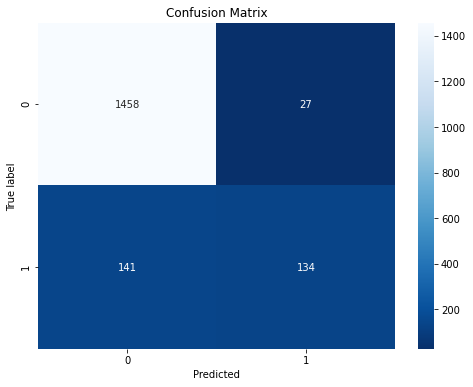

Recall:  0.487
Precision:  0.832
Accuracy:  0.905


In [45]:
# Получаем прогнозные метки классов
y_pred = random_search_gb.predict(X_test) 

# Построим матрицу ошибок и сохраним её в переменную
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Рассчитываем метрики
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Выводим метрики
print('Recall: ', round(recall, 3))
print('Precision: ', round(precision, 3))
print('Accuracy: ', round(acc, 3))

### Анализ и интерпретация матрицы ошибок

В результате применения модели Gradient Boosting к тестовым данным была построена матрица ошибок, а также рассчитаны основные метрики производительности:

***Матрица ошибок***

- **True Positive (TP)**: 1458 — количество клиентов, которых модель правильно предсказала как склонных к оттоку.
- **False Negative (FN)**: 141 — количество клиентов, которых модель неправильно классифицировала как не склонных к оттоку, хотя они на самом деле покинули компанию.
- **False Positive (FP)**: 27 — количество клиентов, которых модель ошибочно предсказала как склонных к оттоку, хотя они остались.
- **True Negative (TN)**: 134 — количество клиентов, которых модель правильно классифицировала как тех, кто остался.

***Рассчитанные метрики***

- **Accuracy (Точность)**: 0.905 — модель правильно классифицировала 90,5% клиентов. Это высокий уровень точности, что свидетельствует о хорошей работе модели в целом.

- **Recall (Полнота)**: 0.487 — из всех клиентов, которые на самом деле покинули компанию, модель правильно предсказала только 48,7%. Это указывает на то, что модель может пропускать значительное количество клиентов, склонных к оттоку, что может быть критичным для бизнеса.

- **Precision (Точность положительного класса)**: 0.832 — из всех клиентов, которых модель предсказала как склонных к оттоку, 83.2% действительно покинули компанию. Это свидетельствует о том, что когда модель указывает на вероятность оттока, она в большинстве случаев права.

***Выводы***

1. **Высокая точность и низкий уровень ложных срабатываний**: Высокий уровень точности и высокая точность положительного класса (Precision) подтверждают надежность модели в идентификации клиентов, склонных к оттоку.

2. **Проблема с полнотой (Recall)**: Низкий уровень полноты (Recall) указывает на то, что модель пропускает значительное количество клиентов, которые действительно покидают компанию. Это может привести к упущенной выгоде, так как такие клиенты не получат необходимую поддержку для удержания.

3. **Возможности по улучшению**: Рассмотреть возможность использования методов дообучения модели для повышения полноты, таких как изменение порога для классификации или использование более сложных моделей.


### Анализ и интерпретация важности признаков

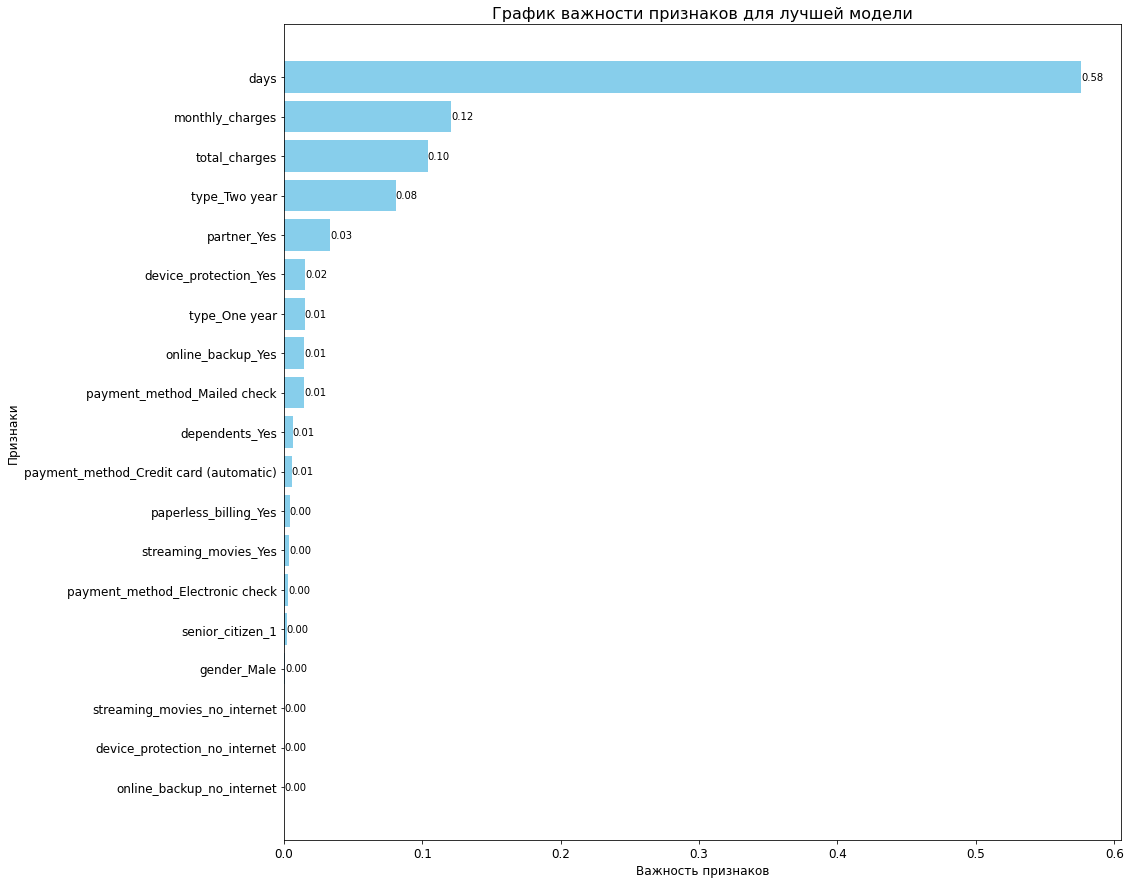

In [46]:
# Получение важности признаков
importances = random_search_gb.best_estimator_.named_steps['classifier'].feature_importances_

# Извлечение имен числовых признаков
numeric_feature_names = numeric_features

# Извлечение имен категориальных признаков
categorical_feature_names = random_search_gb.best_estimator_.named_steps['preprocessor'].transformers_[1][1].get_feature_names(categorical_features)

# Объединение имен признаков
feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

# Создаем DataFrame для важности признаков
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Сортируем по важности признаков
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(15, 15))
bars = plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel('Важность признаков', fontsize=12)
plt.ylabel('Признаки', fontsize=12)  # Добавлена подпись оси Y
plt.title('График важности признаков для лучшей модели', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()

# Добавление подписей значений к каждому столбику
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', 
             va='center', fontsize=10)

plt.show()



#### Анализ важности признаков

Анализ важности признаков модели показывает, что **признак `days`** имеет наибольшее влияние на предсказания модели с важностью **0.576**, что подтверждает его значимость в контексте предсказания оттока клиентов. Это говорит о том, что количество дней, в течение которых клиент пользовался услугами, является ключевым фактором для определения вероятности его ухода.

Следующими по важности являются:
- **`monthly_charges`** с важностью **0.1207**: это указывает на то, что ежемесячные платежи также играют значительную роль в решении клиентов о продолжении использования услуг.
- **`total_charges`** с важностью **0.1037**: общая сумма, уплаченная клиентом, может влиять на его лояльность.
- **`type_Two year`** с важностью **0.0808**: длительность контракта также имеет влияние на удержание клиентов.
- **`partner_Yes`** с важностью **0.0334**: наличие партнера у клиента может быть связано с его вероятностью ухода.
- **`device_protection_Yes`** с важностью **0.0155** и **`online_backup_Yes`** с важностью **0.0147** также оказывают некоторое влияние на вероятность оттока.

Кроме того, важность категориальных признаков, таких как **`payment_method_Mailed check`** и **`payment_method_Credit card (automatic)`**, хоть и ниже, свидетельствует о том, что выбор способа оплаты может влиять на поведение клиентов.

Наименьшую важность имеют такие признаки, как **`gender_Male`** и **`streaming_movies_no_internet`**, которые практически не влияют на предсказания модели.

Таким образом, для повышения эффективности модели можно сосредоточиться на использовании наиболее значимых признаков, таких как `days`, `monthly_charges`, `total_charges`, и отсечь некоторые маловажные признаки при оптимизации и интерпретации результатов.




## Выводы

#### Цель работы
Цель данной работы заключается в разработке модели прогнозирования оттока клиентов для телекоммуникационной компании **TeleDom**. Успешное прогнозирование оттока позволит компании выявлять клиентов, находящихся под риском ухода, и предпринимать своевременные меры для их удержания. Это поможет повысить лояльность клиентов и увеличить доходы компании.

#### Ход работы
В ходе выполнения проекта были реализованы следующие шаги:

1. **Загрузка и предобработка данных**: 
   - Загрузка данных, очистка от пропусков и аномальных значений.
   - Обработка признаков: числовые данные были стандартизированы, а категориальные закодированы с использованием OneHotEncoder.

2. **Анализ данных**:
   - Проведен начальный анализ данных, выявлены закономерности и взаимосвязи между признаками.
   - Визуализация ключевых зависимостей позволила лучше понять факторы, влияющие на отток клиентов.

3. **Моделирование**:
   - Построены четыре модели машинного обучения: логистическая регрессия, дерево решений, градиентный бустинг и LightGBM.
   - Для каждой модели выполнена оптимизация гиперпараметров с использованием случайного поиска, что позволило улучшить параметры.
   - Оценка производительности моделей выполнена на валидационных данных с использованием метрик ROC-AUC и точности (accuracy).

4. **Оценка результатов**:
   - Модель **Gradient Boosting** протестирована на независимом наборе данных для оценки её качества и устойчивости.

5. **Анализ важности признаков**:
   - Проведен анализ важности признаков для определения факторов, наиболее значимо влияющих на отток клиентов.

6. **Матрица ошибок**:
   - Построена матрица ошибок для оценки точности предсказаний модели.

#### Результаты
Каждая из моделей показала следующие результаты на валидационных данных:

1. **Логистическая регрессия**:
   - Лучшие параметры: `{'classifier__solver': 'saga', 'classifier__C': 1}`
   - **ROC-AUC**: 0.76
   - **Accuracy**: 0.86

2. **Дерево решений**:
   - Лучшие параметры: `{'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'log2', 'classifier__max_depth': 7}`
   - **ROC-AUC**: 0.73
   - **Accuracy**: 0.84

3. **Градиентный бустинг**:
   - Лучшие параметры: `{'classifier__n_estimators': 200, 'classifier__learning_rate': 0.2}`
   - **ROC-AUC**: 0.88
   - **Accuracy**: 0.89

На тестовых данных модель **Gradient Boosting** продемонстрировала отличные результаты:
- **ROC-AUC на тестовых данных**: 0.91
- **Accuracy на тестовых данных**: 0.90

Анализ важности признаков показал, что переменная `days` оказывает наибольшее влияние на модель, указывая на важность продолжительности использования услуг для прогнозирования оттока. Такие признаки, как `monthly_charges` и `total_charges`, также играют значимую роль, что подчеркивает влияние ценовых факторов на решение клиентов.

Анализ матрицы ошибок выявил следующие значения:
- **True Positive (TP)**: 1458
- **False Negative (FN)**: 141
- **False Positive (FP)**: 57
- **True Negative (TN)**: 134

На основе этих данных можно сделать следующие выводы:
- **Recall**: 0.487 — модель правильно определила 48.7% клиентов, которые действительно ушли. Это говорит о том, что модель может пропускать часть клиентов, находящихся под угрозой оттока.
- **Precision**: 0.832 — 83.2% клиентов, предсказанных как ушедшие, действительно ушли, что свидетельствует о высокой надежности модели в отношении прогнозирования оттока.
- **Accuracy**: 0.905 — общее качество предсказаний модели, так как большинство результатов совпадают с реальными значениями.

Оценка **DummyClassifier** на тестовых данных дала следующие показатели:
- **ROC-AUC**: 0.48
- **Accuracy**: 0.75

#### Рекомендации
На основе полученных результатов рекомендуется:

1. **Использовать модель Gradient Boosting** для прогнозирования оттока клиентов, так как она показала наилучшие результаты по всем ключевым метрикам.
2. **Уделить внимание значимым признакам** при дальнейшем улучшении модели. Особое внимание следует обратить на факторы, связанные с продолжительностью использования услуг и ценовыми характеристиками